In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer

In [ ]:

# Define file path
df = pd.read_csv('/content/Loan Prediction Dataset.csv')  # Update path accordingly
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# Check the column names in your DataFrame
print(df.columns)



Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
# Handle missing values (simple approach)
df.ffill(inplace=True)  # Forward fill missing values

# Remove rows with missing values in X and corresponding rows in y
X_train = X_train.dropna()
y_train = y_train[X_train.index]

In [ ]:
# Impute missing values

imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean
X = imputer.fit_transform(X)

In [ ]:

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education',
                    'Self_Employed', 'Property_Area', 'Loan_Status']


In [ ]:

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
# Prepare features and target
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

In [ ]:
# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

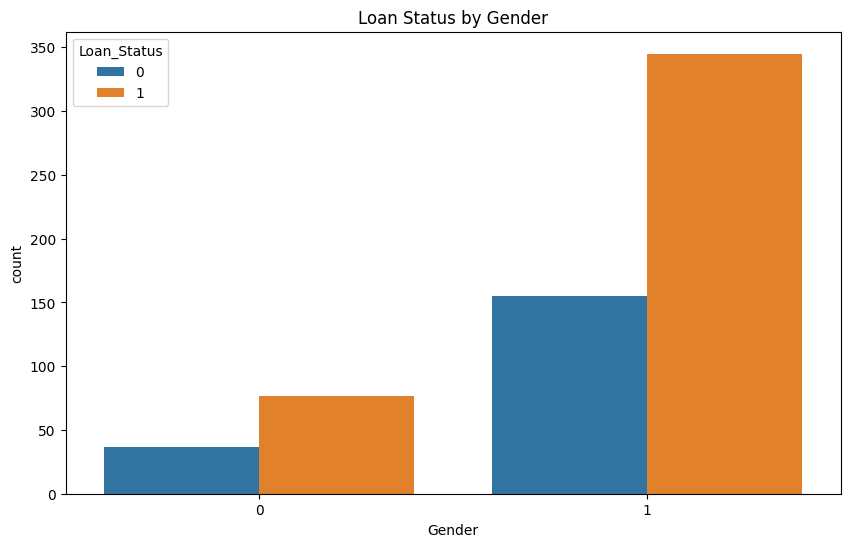

In [ ]:
# Bar plots for categorical features
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=df) # Added data=df
plt.title('Loan Status by Gender')
plt.show()

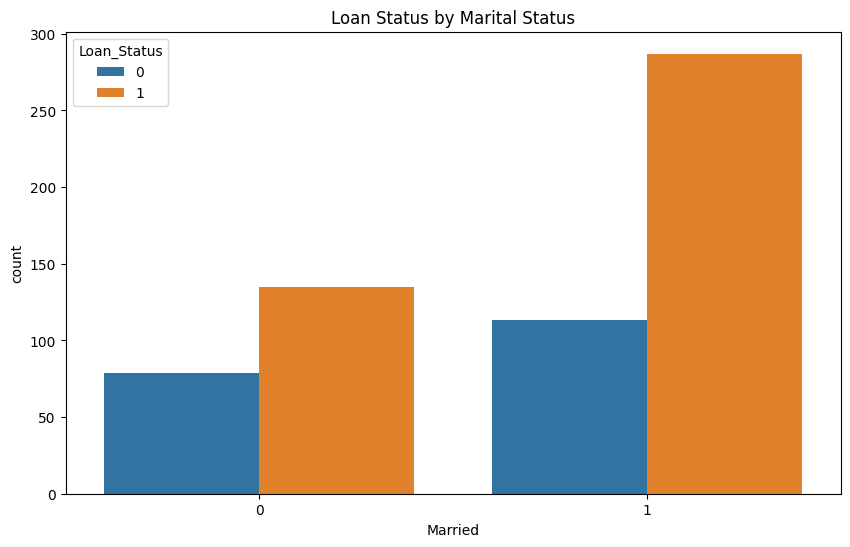

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.title('Loan Status by Marital Status')
plt.show()

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Predictions and probabilities
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

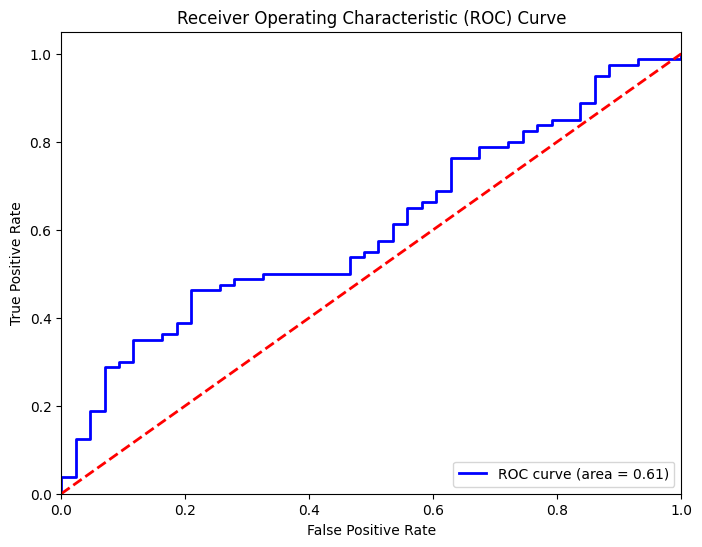

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Factor Analysis
fa = FactorAnalysis(n_components=2)
X_factors = fa.fit_transform(X)

In [ ]:

# Create a DataFrame with factor scores
fa_df = pd.DataFrame(X_factors, columns=['Factor1', 'Factor2'])

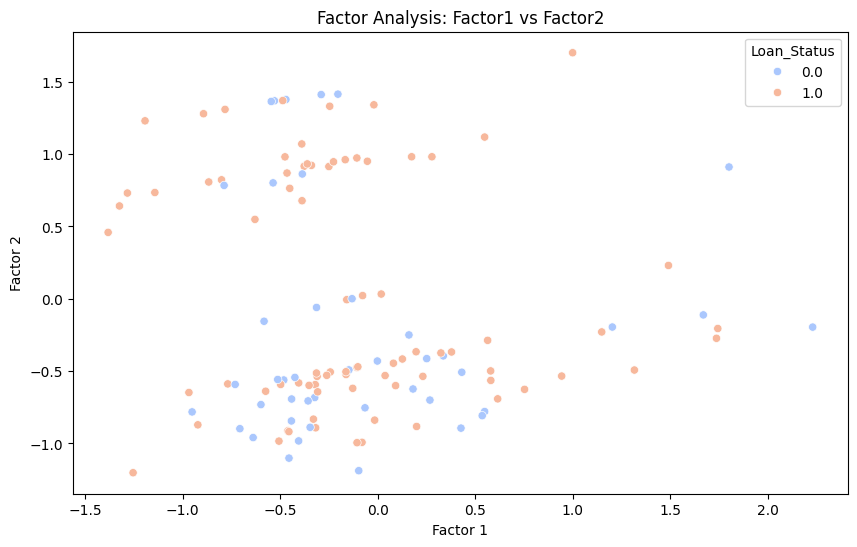

In [ ]:
# Visualize factor scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fa_df, x='Factor1', y='Factor2', hue=y_test.reset_index(drop=True), palette='coolwarm')
plt.title('Factor Analysis: Factor1 vs Factor2')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()
